# This notebook is for course two : Data understanding and Preparation  
Please try to go through the code steps mentioned in the course and try to create the code on your own. Use this document as a reference incase you face problems in writing the code

# Importing Data files

In [1]:
#Import Product DataSet here
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_728c62a031374147b65b556e94e09079 = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_728c62a031374147b65b556e94e09079 = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_728c62a031374147b65b556e94e09079 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-OP5puvvuIBdHlPQ-f0qw1o3D1cVZ_2xAuFzoLxdb3LJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_728c62a031374147b65b556e94e09079)

body = client_728c62a031374147b65b556e94e09079.get_object(Bucket='project1-donotdelete-pr-jktfwlngpkhkd8',Key='Product Data Set - Student 2 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

product_data = pd.read_csv(body)
product_data.head()
 


,PRODUCT CODE|PRODUCT CATEGORY|UNIT LIST PRICE
0,30001|HEALTH & BEAUTY| $7.45
1,30002|HEALTH & BEAUTY| $5.35
2,30003|HEALTH & BEAUTY| $5.49
3,30004|HEALTH & BEAUTY| $6.46
4,30005|HEALTH & BEAUTY| $7.33


In [2]:
#Import Transaction DataSet 
body = client_728c62a031374147b65b556e94e09079.get_object(Bucket='project1-donotdelete-pr-jktfwlngpkhkd8',Key='Transaction Data Set - Student 3 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

transactions_data = pd.read_csv(body)
transactions_data.head()


,CUSTOMER NUM|PRODUCT NUM|QUANTITY PURCHASED|DISCOUNT TAKEN|TRANSACTION DATE|STOCKOUT
0,10114|30011|4|0|1/2/2015|0
1,10217|30016|3|0|1/2/2015|0
2,10224|30013|4|0|1/2/2015|0
3,10103|30012|3|0.2|1/2/2015|0
4,10037|30010|8|0|1/2/2015|0


In [3]:
#Import Customer Dataset Here
body = client_728c62a031374147b65b556e94e09079.get_object(Bucket='project1-donotdelete-pr-jktfwlngpkhkd8',Key='Customer Data Set - Student 1 of 3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

customer_data = pd.read_csv(body)
customer_data.head()


,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


# Quick Data Exploration

In [4]:
product_data.shape

(30, 1)

In [5]:
transactions_data.shape

(10000, 1)

In [6]:
customer_data.shape

(500, 9)

###### We can conclude from the above that Retailer X sells 30 products and served 500 customers in a total of 10,000 recorded transactions. 

In [7]:
type(customer_data)

pandas.core.frame.DataFrame

In [8]:
type(customer_data.AGE)

pandas.core.series.Series

In [9]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [10]:
transactions_data.dtypes

CUSTOMER NUM|PRODUCT NUM|QUANTITY PURCHASED|DISCOUNT TAKEN|TRANSACTION DATE|STOCKOUT    object
dtype: object

In [11]:
# Remove the $  and , sign from INCOME by applying a string replace method
#map() function in Python takes in a function and a list.

customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [12]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"94,475",9,notenrolled,NaN,6,Married


In [13]:
# Remove the $  and , sign from INCOME by applying a string replace method
#map() function in Python takes in a function and a list.
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

In [14]:
customer_data.head(2)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married


In [15]:
customer_data.dtypes

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object

In [16]:
customer_data['INCOME'].dtypes

dtype('int64')

Now running the “dtypes” method reveals that data type conversion of INCOME was successful 

In [17]:
customer_data["MARITAL STATUS"].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [18]:
customer_data["INCOME"].describe()

count       500.000000
mean      85792.482000
std       37157.766304
min       20256.000000
25%       52429.000000
50%       86846.500000
75%      118381.000000
max      149999.000000
Name: INCOME, dtype: float64

In [19]:
customer_data["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [20]:

"""
Enrolment Date column is a date and should be represented as a datetime object
Datetime.strptime is a method that returns a datetime that corresponds to date_string
Running this command without using this method produces an error because there are null values in the column
To bypass this error, apply only the conversion function to the not-null values
by applying a filter on the column and then converting it.
"""

from datetime import datetime
customer_data['ENROLLMENT DATE']=\
customer_data['ENROLLMENT DATE'][customer_data['ENROLLMENT DATE'].notnull()].map(lambda x :datetime.strptime(x, '%d-%m-%Y') )

In [21]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

## Data Quality
Data used in this tutorial is mostly free from data quality issues, however in real life, data scientists deal with data sets that needs to be cleaned and corrected for their quality issues

In [22]:
print('null values for transactoins ?',transactions_data.isnull().values.any())
print('null values for products ?',product_data.isnull().values.any())
print('null values for customers ?',customer_data.isnull().values.any())

null values for transactoins ? False
null values for products ? False
null values for customers ? True


In [23]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

It turned out that ENROLMENT DATE is the only column which has null values. 
The reasons behind is that not all customers are enrolled to loyalty and hence there is no enrolment date

# Analysis of the distribution of variables using graphs 

In [24]:
import matplotlib.pyplot as plt


In [25]:
customer_data.head (5)

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single
1,10002,0,42,94475,9,notenrolled,NaT,6,Married
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single
4,10005,0,30,51498,3,notenrolled,NaT,1,Single


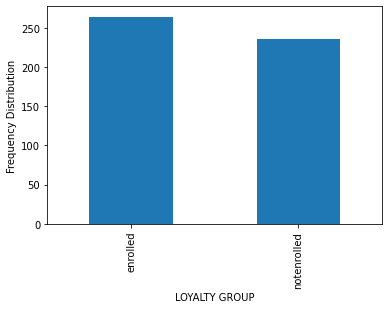

In [26]:
customer_data['LOYALTY GROUP'].value_counts().plot(kind='bar')
plt.xlabel("LOYALTY GROUP")
plt.ylabel("Frequency Distribution")
plt.show()

### Univariate Analysis (Single variable analysis)

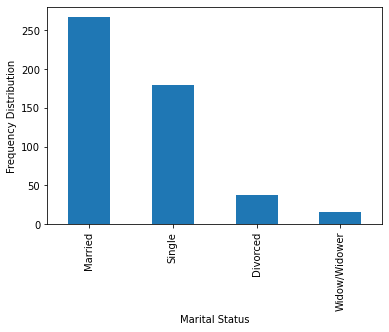

In [27]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Frequency Distribution")
plt.show()

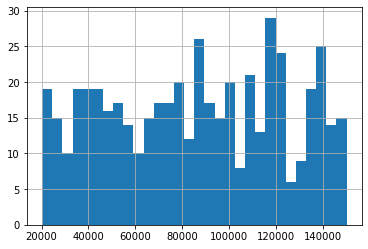

In [28]:
customer_data['INCOME'].hist(bins=30)  
plt.show()

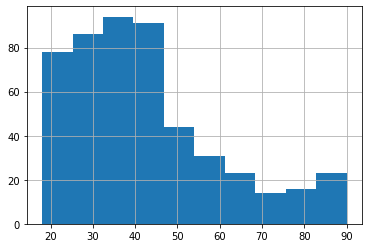

In [29]:
customer_data['AGE'].hist(bins=10)  
plt.show()

In [30]:
customer_data['AGE'].describe()

count    500.000000
mean      42.316000
std       17.567509
min       18.000000
25%       30.000000
50%       39.000000
75%       50.250000
max       90.000000
Name: AGE, dtype: float64

In [31]:
customer_data['AGE'].head(10)

0    64
1    42
2    40
3    38
4    30
5    63
6    33
7    49
8    44
9    36
Name: AGE, dtype: int64

### Constructing new features and generating Insights

Remember our business understanding objectives
1-Understanding the factors associated with loyalty program participation
2-Understanding the factors associated with increased spending


In [32]:
transactions_data.head()

,CUSTOMER NUM|PRODUCT NUM|QUANTITY PURCHASED|DISCOUNT TAKEN|TRANSACTION DATE|STOCKOUT
0,10114|30011|4|0|1/2/2015|0
1,10217|30016|3|0|1/2/2015|0
2,10224|30013|4|0|1/2/2015|0
3,10103|30012|3|0.2|1/2/2015|0
4,10037|30010|8|0|1/2/2015|0


In [33]:

#product_data['PRODUCT CODE'] = product_data['PRODUCT CODE']
product_data.head()

,PRODUCT CODE|PRODUCT CATEGORY|UNIT LIST PRICE
0,30001|HEALTH & BEAUTY| $7.45
1,30002|HEALTH & BEAUTY| $5.35
2,30003|HEALTH & BEAUTY| $5.49
3,30004|HEALTH & BEAUTY| $6.46
4,30005|HEALTH & BEAUTY| $7.33


In [34]:
list(product_data.columns)

['PRODUCT CODE|PRODUCT CATEGORY|UNIT LIST PRICE']

In [54]:
"""
Create a Pandas frame that is called “trans_products” by joining transactions_data and product_data.
Use the merge command and specify the join method as inner and specify the columns to join. 

"""
trans_products = transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on= 'PRODUCT CODE')

#trans_products = transactions_data.merge (product_data,how ='inner' , left_on = 'PRODUCT CODE' ,right_on = 'PRODUCT NUM')

KeyError: 'PRODUCT CODE'

In [52]:
trans_products.head()

NameError: name 'trans_products' is not defined

In [39]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

NameError: name 'trans_products' is not defined

In [40]:
trans_products.dtypes

NameError: name 'trans_products' is not defined

In [48]:
"""
total price column = (quantity x unit price ) -discounts taken
"""
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

NameError: name 'trans_products' is not defined

In [57]:
trans_products.head()

NameError: name 'trans_products' is not defined

In [58]:
Income_by_product = trans_products.groupby('PRODUCT CATEGORY').agg({'Total_Price':'sum'}).sort_values('Total_Price',ascending=False)

NameError: name 'trans_products' is not defined

In [59]:
Income_by_product

NameError: name 'Income_by_product' is not defined

In [60]:
Revenue_by_product=Income_by_product.rename(columns={'Total_Price':'Revenue Per Product'})

NameError: name 'Income_by_product' is not defined

In [61]:
Revenue_by_product['Revenue Per Product'].plot(kind='pie',autopct='%1.1f%%',legend = True)

NameError: name 'Revenue_by_product' is not defined

##### For each customer , we will calculate total spend ,total spend per category ,recent transaction date

In [62]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})

NameError: name 'trans_products' is not defined

In [63]:
customer_prod_categ.head()

NameError: name 'customer_prod_categ' is not defined

In [64]:
customer_prod_categ.columns

NameError: name 'customer_prod_categ' is not defined

In [65]:
customer_prod_categ.reset_index().head()

NameError: name 'customer_prod_categ' is not defined

In [66]:
customer_prod_categ=customer_prod_categ.reset_index()

NameError: name 'customer_prod_categ' is not defined

In [67]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

NameError: name 'customer_prod_categ' is not defined

In [68]:
customer_pivot.head()

NameError: name 'customer_pivot' is not defined

In [69]:
trans_products['TRANSACTION DATE']=trans_products['TRANSACTION DATE'].map(lambda x :datetime.strptime(x, '%m/%d/%Y') )

NameError: name 'trans_products' is not defined

In [70]:
recent_trans_total_spend=trans_products.groupby('CUSTOMER NUM').\
agg({'TRANSACTION DATE':'max','Total_Price':'sum'}). \
rename(columns={'TRANSACTION DATE':'RECENT TRANSACTION DATE','Total_Price':'TOTAL SPENT'})
recent_trans_total_spend.head()

NameError: name 'trans_products' is not defined

In [71]:
customer_KPIs=customer_pivot.merge(recent_trans_total_spend,how='inner',left_index=True, right_index=True )

NameError: name 'customer_pivot' is not defined

In [72]:
customer_KPIs.head()

NameError: name 'customer_KPIs' is not defined

In [73]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

NameError: name 'customer_KPIs' is not defined

In [74]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

NameError: name 'customer_KPIs' is not defined

In [75]:
customer_all_view.head()

NameError: name 'customer_all_view' is not defined

## Bivariate Analysis (2-variable analysis) – Loyalty as a target variable 

#### Gender

In [76]:
table=pd.crosstab(customer_all_view['GENDER'],customer_all_view['LOYALTY GROUP'])
table

NameError: name 'customer_all_view' is not defined

In [77]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

NameError: name 'table' is not defined

#### Experience Score

In [78]:
table=pd.crosstab(customer_all_view['EXPERIENCE SCORE'],customer_all_view['LOYALTY GROUP'])
table

NameError: name 'customer_all_view' is not defined

In [79]:
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

NameError: name 'table' is not defined

#### Marital Status

In [80]:
table=pd.crosstab(customer_all_view['MARITAL STATUS'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

NameError: name 'customer_all_view' is not defined

#### Age

In [81]:
customer_all_view['AGE_BINNED'] = pd.cut(customer_all_view['AGE'],10) # 10 bins of age

NameError: name 'customer_all_view' is not defined

In [82]:
customer_all_view['AGE_BINNED'].value_counts()

NameError: name 'customer_all_view' is not defined

In [83]:
table=pd.crosstab(customer_all_view['AGE_BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

NameError: name 'customer_all_view' is not defined

In [84]:
customer_all_view.groupby("LOYALTY GROUP").agg({'AGE':'mean'})

NameError: name 'customer_all_view' is not defined

NameError: name 'customer_all_view' is not defined

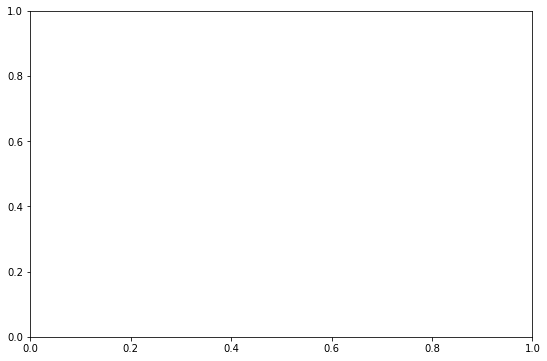

In [85]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plot1=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "enrolled"]
plot2=customer_all_view['AGE'][customer_all_view['LOYALTY GROUP'] == "notenrolled"]
list1=[plot1,plot2]
ax.boxplot(list1,0,'rs',1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.grid( linestyle='-', linewidth=1)
plt.show()

#### Total Spend

In [86]:
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10) # 10 bins of age

NameError: name 'customer_all_view' is not defined

In [87]:
table=pd.crosstab(customer_all_view['TOTAL SPENT BINNED'],customer_all_view['LOYALTY GROUP'])
table.plot(kind='bar', stacked=True,figsize=(6,6))
plt.show()

NameError: name 'customer_all_view' is not defined

## Bivariate Analysis (2-variable analysis) – Customer spend as a target variable 

#### Age

In [88]:
plt.scatter(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])
plt.xlabel("AGE")
plt.ylabel("Total Spent")
plt.show()

NameError: name 'customer_all_view' is not defined

In [89]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'],customer_all_view['TOTAL SPENT'])

NameError: name 'customer_all_view' is not defined

#### Income

In [90]:
plt.scatter(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.show()

NameError: name 'customer_all_view' is not defined

In [91]:
pearsonr(customer_all_view['INCOME'],customer_all_view['TOTAL SPENT'])

NameError: name 'customer_all_view' is not defined

#### Experience Score

In [92]:
table = customer_all_view.groupby(['EXPERIENCE SCORE']).agg({'TOTAL SPENT':'mean'}).reset_index()

NameError: name 'customer_all_view' is not defined

In [93]:
table['TOTAL SPENT'].plot(kind='bar')
plt.xlabel("Experience Score")
plt.ylabel("Average Total Spent per Score")
plt.xticks([0,1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9,10])    
plt.show()


NameError: name 'table' is not defined